> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, I have chosen some datasets from the Gapminder dataset collection [<a>https://www.gapminder.org/data/</a>]
> <b>Loading Data:</b>
I have chosen the following datsets for exploratory data analysis. 
1. Income per person
2. Literacy rate in adults - ages 15 and above
3. Population total
4. Female presence in both houses of parliament
5. Mean years in school Women w.r.t. Mean (25-34 years)
6. Democracy Ratings 

### Questions
The following are the questions which I will be attempting to answer through EDA:

<a href='#q1'>Research Question 1: </a>
Which countries exhibit the highest fluctuation in population over the last 5 decades?<br>
<a href='#q2'>Research Question 2:</a> 
Which countries exhibit the highest literacy rate? <br>
<a href='#q3'>Research Question 3:</a> 
Is there any corelation between the selected variables? <br>
<a href='#q4'>Research Question 4:</a> 
Analysis of univariate data

In [1]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
#loading data
income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
literacy = pd.read_csv('literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv')
population = pd.read_csv('population_total.csv')

wnp = pd.read_csv('wn_bothhouses_c.csv')
literacy_wvm = pd.read_csv('mean_years_in_school_women_percent_men_25_to_34_years.csv')

democracy = pd.read_csv('democracy_score_use_as_color.csv')

### Data Cleaning 

> As a first step, the data will have to be prepared for further analysis. This preparation, or cleaning will include the following:
1. Removing Null values
2. Dropping irrelevant columns
3. Merging of all datasets to form a single dataset to work with
4. Removing duplicate values

In [3]:
#list of datasets
datasets = [income, literacy, population, literacy_wvm, democracy, wnp]

#most columns before year 1970 are blank, so these should be removed. In this step, I am also dropping duplicate rows

for index, dataset in enumerate(datasets):
    for column in dataset:
        if str(column)!='country': 
            if(int(column)<=1970): 
                dataset.drop(column, axis=1, inplace=True)
            if(int(column)>=2020): 
                dataset.drop(column, axis=1, inplace=True)
    dataset.drop_duplicates(keep=False,inplace=True)

In [4]:
#here, I am transposing each individual dataset to get all the sets in a specific format
population_v1 = (population.melt(['country'], var_name='year')
         .pivot_table(index=['country','year'], values='value', aggfunc='mean')
         .reset_index()
         )
population_v1.rename(columns = {'value':'population'}, inplace = True) 

literacy_v1 = (literacy.melt(['country'], var_name='year')
         .pivot_table(index=['country','year'], values='value', aggfunc='mean')
         .reset_index()
              ) 
literacy_v1.rename(columns = {'value':'literacy_rate'}, inplace = True) 

income_v1 = (income.melt(['country'], var_name='year')
         .pivot_table(index=['country','year'], values='value', aggfunc='mean')
         .reset_index()
         )
income_v1.rename(columns = {'value':'income'}, inplace = True) 

literacy_wvm_v1 = (literacy_wvm.melt(['country'], var_name='year')
         .pivot_table(index=['country','year'], values='value', aggfunc='mean')
         .reset_index()
         )
literacy_wvm_v1.rename(columns = {'value':'gender_ratio_school'}, inplace = True) 

democracy_v1 = (democracy.melt(['country'], var_name='year')
         .pivot_table(index=['country','year'], values='value', aggfunc='mean')
         .reset_index()
         )
democracy_v1.rename(columns = {'value':'democracy_rating'}, inplace = True) 

wnp_v1 = (wnp.melt(['country'], var_name='year')
         .pivot_table(index=['country','year'], values='value', aggfunc='mean')
         .reset_index()
         )
wnp_v1.rename(columns = {'value':'women_in_parliament'}, inplace = True) 

In [5]:
#merging datasets into a single DataFrame of the form 'country, year, indicator1_value, indicator2_value...'
final_data = pd.merge(population_v1, literacy_v1,
                          on=['country','year'],how='left')
final_data = pd.merge(final_data, income_v1,
                          on=['country','year'],how='left')
final_data = pd.merge(final_data, literacy_wvm_v1,
                          on=['country','year'],how='left')
final_data = pd.merge(final_data, democracy_v1,
                          on=['country','year'],how='left')
final_data = pd.merge(final_data, wnp_v1,
                          on=['country','year'],how='left')

final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9555 entries, 0 to 9554
Data columns (total 8 columns):
country                9555 non-null object
year                   9555 non-null object
population             9555 non-null int64
literacy_rate          561 non-null float64
income                 9457 non-null float64
gender_ratio_school    8415 non-null float64
democracy_rating       6518 non-null float64
women_in_parliament    7935 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 671.8+ KB


From the output, it can be seen that there are a lot of null values which will have to be removed. I am using linear interpolation to remove them. Also converting the 'year'  column into int.

In [6]:
final_data = final_data.groupby('country').apply(lambda group: group.interpolate(method='linear'))
final_data['year'] = final_data['year'].astype(int)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9555 entries, 0 to 9554
Data columns (total 8 columns):
country                9555 non-null object
year                   9555 non-null int32
population             9555 non-null int64
literacy_rate          4707 non-null float64
income                 9457 non-null float64
gender_ratio_school    9163 non-null float64
democracy_rating       7859 non-null float64
women_in_parliament    7939 non-null float64
dtypes: float64(5), int32(1), int64(1), object(1)
memory usage: 634.5+ KB


In [ ]:
final_data.head()

<a id='eda'></a>
## Exploratory Data Analysis

<a id='q1'></a>
### Research Question 1: Which countries exhibit the highest fluctuation in population over the last 5 decades?

In the first stage, I created a new column that computed the decade for each row based on the value of the 'year' column. Then, I created a new dataframe that shows the percentage change for all countries in each decade.

In [7]:
bins = range(final_data['year'].min(), final_data['year'].max() + 10, 10)
labels = [f'{i}-{j-1}' for i, j in zip(bins[:-1], bins[1:])] 

final_data['decade'] = pd.cut(final_data.year, bins=bins, labels=labels, include_lowest=True)

population_change = (final_data.pivot_table(index='country', 
                    columns='decade', 
                    values='population', 
                    aggfunc='sum')
        .pct_change(axis=1))
population_change.columns = population_change.columns.add_categories(['country'])
population_change.columns = pd.Index(list(population_change.columns))
population_change.reset_index(inplace=True)
population_change.head()

,country,1971-1980,1981-1990,1991-2000,2001-2010,2011-2020
0,Afghanistan,NaN,-0.127949,0.525410,0.427190,0.047440
1,Albania,NaN,0.131220,0.023135,-0.032484,-0.238644
2,Algeria,NaN,0.240212,0.253840,0.158557,-0.056094
3,Andorra,NaN,0.370541,0.335852,0.255028,-0.212721
4,Angola,NaN,0.314051,0.395636,0.404487,0.099226


I then created a new column, 'diff' in the new DataFrame that calulates the difference between the first and last decade, and then filtered the top 5 countries showing the highest difference.

In [8]:
population_change['diff'] = abs(population_change['1981-1990'] - population_change['2011-2020'])
large5 = population_change.nlargest(5, 'diff') 
large5.set_index('country', inplace=True)
large5 = large5.transpose()

largenew = large5.rename_axis('decade').reset_index()
largenew = largenew[largenew.decade != 'diff']
largenew = largenew[largenew.decade != '1971-1980']
largenew

country,decade,United Arab Emirates,Djibouti,Andorra,Saudi Arabia,Marshall Islands
1,1981-1990,1.082990,0.686978,0.370541,0.603019,0.410776
2,1991-2000,0.738127,0.366770,0.335852,0.370899,0.225249
3,2001-2010,1.270588,0.208094,0.255028,0.296046,0.097677
4,2011-2020,0.254555,-0.078750,-0.212721,0.025291,-0.165853


<b>Observations:</b><br>
Plotting the results using a line chart shows that the population increase is dwindling in some of the smaller countries in Europe, Asia and America

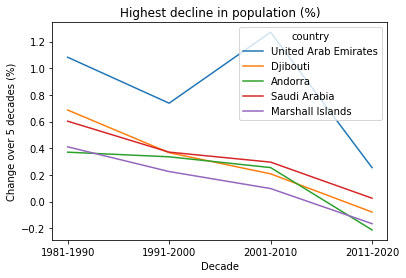

<Figure size 1400x700 with 0 Axes>

In [9]:
x=[0,1,2,3]
labels = list(largenew['decade'])

largenew.plot.line(x = 'decade')

plt.xlabel("Decade")
plt.xticks(x, labels)
plt.ylabel("Change over 5 decades (%)")
plt.title('Highest decline in population (%)')
plt.figure(dpi=100, figsize=(14, 7))

plt.show()

<a id='q2'></a>
### Research Question 2:  Which countries exhibit the highest literacy rate?

First, I calculated the percentage change in literacy rate for each country

In [10]:
final_data['lit_pct'] = final_data.groupby('country').literacy_rate.pct_change()

# set up an aggregated dataframe containing the mean values for every country
df_aggregated = final_data.groupby('country').mean()
# replace infinite values by nan
df_aggregated = df_aggregated.replace([np.inf, -np.inf], np.nan)
df_lit_pct_sorted = df_aggregated.sort_values(by='lit_pct', 
            ascending=False).head(10)['lit_pct'].to_frame().reset_index()

Plotting countries with highest literacy rate.<br> 
<b>Observations:</b><br>
Some economically backward countries are showing a positive growth in literacy rate since 1970

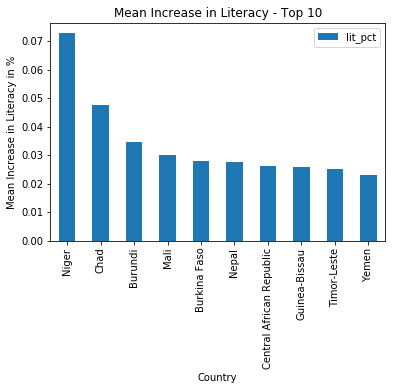

In [11]:
df_lit_pct_sorted.plot.bar()
plt.xticks(np.arange(10), df_lit_pct_sorted['country'])
plt.xlabel("Country")
plt.ylabel("Mean Increase in Literacy in %")
plt.title('Mean Increase in Literacy - Top 10')
plt.show()

<a id='q3'></a>
### Research Question 3:  Is there any corelation between the selected variables?

I will now perform some comparative analysis between features to understand if there is any corelation between them <br>
The following features will be compared with each other:
1. Literacy Rate vs Income
2. Literacy Rate vs Democracy Rating
3. Gender ratio vs Women in Parliament

Plotting the graphs from the aggregated DataFrame

In [20]:
def plotGraphs(x,y,xlabel,ylabel,title):
    rng = np.random.RandomState(0)
    sizes = 1000 * rng.rand(100)
    plt.scatter(x,y,s=sizes,alpha=0.3,cmap='viridis')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

<b>Observations:</b>
1. Literacy/Income corelation<br>
From the plotted graphs, it can be seen that there is a direct corelation between income and literacy. An increase in literacy contributes to higher average incomes, which is expected
2. Literacy/Democracy corelation<br>
Education plays an important role in any democracy, and it can be seen from the graph which shows high democracy ratings for high literacy rates. 
3. Literacy rate among women vs female representation in parliament<br>
It can be seen that with increase in ratio of women to men in school, there is an increase in representation of women in parliament <br>

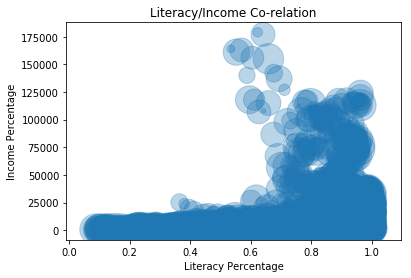

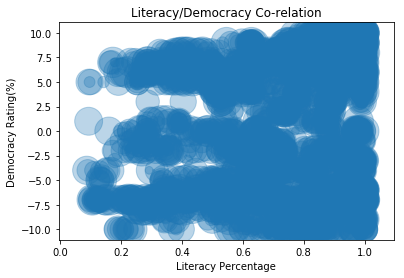

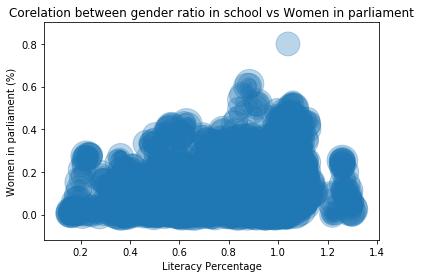

In [21]:
plotGraphs(final_data['literacy_rate'],final_data['income'],'Literacy Percentage','Income Percentage','Literacy/Income Co-relation')
plotGraphs(final_data['literacy_rate'],final_data['democracy_rating'],'Literacy Percentage','Democracy Rating(%)','Literacy/Democracy Co-relation')
plotGraphs(final_data['gender_ratio_school'],final_data['women_in_parliament'],'Literacy Percentage','Women in parliament (%)','Corelation between gender ratio in school vs Women in parliament')

<a id='q4'></a>
### Research Question 4:  Analysis of univariate data

From the boxplot and histogram below, it can be seen that democracy ratings of 8-10 are the most common, and that there are no outliers in the variable

In [ ]:
final_data.boxplot(column=['democracy_rating'])
final_data.hist('democracy_rating')

<a id='conclusions'></a>
## Conclusions

1. Some countries are showing a drastic decrease in population growth over the past few decades, and that is surprising. More in-depth analysis would be required to know what factors contribute to this decrease. 
2. Low income countries such as Niger, Nepal, Chad, etc. are showing an increase in the literacy rate, which is a good sign
3. There is an increase in average income with increase in literacy rate, which is expected
4. It can be seen that, with increase in number of literate women, there is also an increase in presence of women in parliament
<br><br>
<b>Limitations:</b>
<ul>
<li> A lot of the data from the Female Reperesenation in parliament, or literacy ratio is incomplete. With more data, efficient and correct analysis can be generated. </li>
<li>With more data points, comprehensive analysis can be done for socioeconomic data in each country. </li>
</ul>